In [40]:
a, b, c = 11, 5, 23

s = set()
stack = [(0, 0, 23)]
answer = set()
while stack:
    out = stack.pop()
    if out[0] == 0:
        answer.add(out[2])
    before = len(s)
    s.add(out)
    after = len(s)
    if before == after:
        continue
    else:
        if a != 0:
            ab = (out[1] + out[0] - min(b, out[1] + out[0]), min(b, out[1] + out[0]), out[2])
            ac = (out[2] + out[0] - min(c, out[2] + out[0]), out[1], min(c, out[2] + out[0]))
            stack.append(ab)
            stack.append(ac)
        if b != 0:
            ba = (min(a, out[1] + out[0]), out[0] + out[1] - min(a, out[1] + out[0]), out[2])
            bc = (out[0], out[1] + out[2] - min(c, out[2] + out[1]), min(c, out[2] + out[1]))
            stack.append(ba)
            stack.append(bc)
        if c != 0:
            ca = (min(a, out[2] + out[0]), out[1], out[2] + out[0] - min(a, out[2] + out[0]))
            cb = (out[0], min(b, out[2] + out[1]), out[1] + out[2] - min(b, out[2] + out[1]))
            stack.append(cb)
            stack.append(ca)

for num in sorted(answer):
    print(num, end = ' ')

18 19 20 21 22 23 

In [2]:
# !pip install opencv-python

In [11]:
# 2. 네이버에 '하나은행'과 관련된 뉴스 기사를 검색하여, 상위 40개의 뉴스 기사의 제목과 내용을 수집하시오. 

import pyautogui
import pyperclip
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

In [12]:
driver = webdriver.Chrome()
driver.get('https://www.naver.com')
time.sleep(2)

In [13]:
# 특정 이미지를 찾아 해당 이미지의 좌표를 찾아온 뒤 클릭
point_img = pyautogui.locateOnScreen('search1.PNG', confidence = 0.8)
site = pyautogui.center(point_img)
pyautogui.moveTo(site)
time.sleep(1)

# 마우스 커서가 이동한 위치를 클릭 하여 지정된 글을 입력
pyautogui.click()

# pyperclip라이브러리 활요하여 하나은행 검색어 입력
pyperclip.copy('하나은행')
pyautogui.hotkey('ctrl', 'v')
pyautogui.write(['enter'])

In [14]:
# 뉴스 탭 클릭
driver.find_element(By.XPATH, '//*[@id="lnb"]/div[1]/div/div[1]/div/div[1]/div[8]/a').click()

In [ ]:
# 해당 페이지에 스크롤을 계속 내려 띄워진 정보들을 모두 수집
# 스크롤을 약 50회 반복하여 내림
for _ in range(50):
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    time.sleep(0.5)

In [18]:
# 현재 웹 크롤러에 의해 동작되고 있는 페이지의 html 정보 추출
html = BeautifulSoup(driver.page_source)

# 뉴스 기사 제목 수집
news_title = html.find_all('a', class_='lu8Lfh20c9DvvP05mqBf tym_MoKIfC84Aqvg9SKg')
title_list = [x.get_text() for x in news_title]
context = html.find_all('a', class_='lu8Lfh20c9DvvP05mqBf OmR0jkNgHXA6BZNhMfn2')
context_list = [x.get_text() for x in context]

In [19]:
import pandas as pd


df1 = pd.DataFrame(data={'제목': title_list, '내용': context_list})

- 자연어 처리 라이브러리 설치
  1. java jdk 프로그램 설치
     - https://www.oracle.com/kr/java/technologies/downloads/
    
  2. 환경 변수 설정

In [20]:
# !pip install Jpype1
# !pip install konlpy

In [21]:
from konlpy.tag import Okt

In [22]:
# 한국어 문장에서 형태소(POS, 말의 가장 작은 단위)를 찾아, 형태소 단위로 분해
okt = Okt()

In [27]:
# okt 함수를 활용하여, 형태소 분석 수행
# 형태소 분석 -> 토큰화 -> 품사 부착
text1 = df1['제목'].values.tolist()[1]
pd.DataFrame(okt.pos(text1))

,0,1
0,기보,Noun
1,·,Punctuation
2,하나은행,Noun
3,",",Punctuation
4,호남,Noun
5,기술,Noun
6,중소기업,Noun
7,금융,Noun
8,지원,Noun
9,맞,Verb


In [28]:
df_pos = pd.DataFrame()
for i in range(len(df1['제목'])):
    text = df1['제목'].values.tolist()[i]
    pos_n = pd.DataFrame(okt.pos(text))
    df_pos = pd.concat([df_pos, pos_n])

df_pos

,0,1
0,하나은행,Noun
1,74억원,Number
2,부당,Noun
3,대출,Noun
4,발생,Noun
...,...,...
9,오피스,Noun
10,세미나,Noun
11,’,Punctuation
12,첫,Noun


In [31]:
df_pos[1].value_counts()

1
Noun           4292
Punctuation    1295
Number          312
Josa            249
Foreign         121
Verb            103
Alpha            95
Modifier         82
Adjective        38
Suffix           30
Adverb           16
Determiner        4
Name: count, dtype: int64

In [36]:
df2 = df_pos.rename(columns={0:'형태소', 1:'품사'})

cond1 = (df2['품사'] == 'Punctuation')
df2.loc[cond1]

,형태소,품사
5,…,Punctuation
1,·,Punctuation
3,",",Punctuation
0,[,Punctuation
2,],Punctuation
...,...,...
1,",",Punctuation
2,",",Punctuation
8,’,Punctuation
1,",",Punctuation


In [38]:
# 워드 클라우드 시각화 라이브러리 설치
# !pip install wordcloud

from wordcloud import WordCloud

In [40]:
wc = WordCloud(background_color='white', width=800, height=600, font_path='Malgun.ttf').generate(" ".join(df2['형태소']))

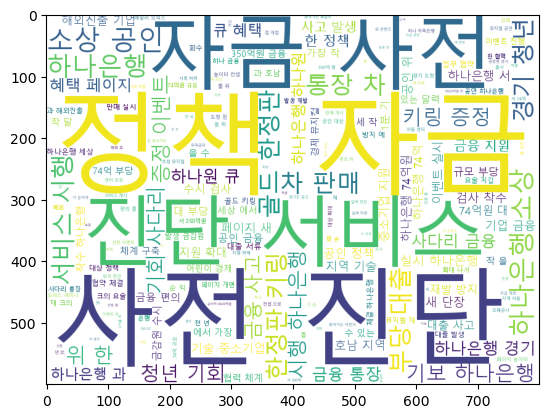

In [42]:
import matplotlib.pyplot as plt

plt.imshow(wc)